# Now, before we <b>begin</b>. Let's <b>Understand</b> Basically What is a <b>Churn</b> ?

# *It, refers to the phenomenon where <b>customers</b> stop using a company's <b>product</b> or <b>service</b>.<br><br> *It’s a critical <b>metric</b> for <b>businesses</b>, especially those that rely on <b>recurring revenue</b>, such as <b>subscription services</b>, <b>telecom companies</b>, and <b>financial institutions</b>.

<hr>

# Let's Begin ...

<h1>1. Loading the Dataset.</h1>

In [119]:
import pandas as pd
df=pd.read_csv(r'https://raw.githubusercontent.com/aysh01/CODSOFT-ML/main/Level%202/Churn_Modelling.csv')

<hr><hr>

<h1>2. Initial <b>Exploration</b>.</h1>

In [120]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<hr><hr>

<h1>3. Checking for <b>Missing</b> Values.</h1>

In [121]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


<hr><hr>

<h1>4. Understanding the <b>Target</b> Variable.</h1>

*   <h2>The <b>target</b> variable is likely <b>related</b> to <b>customer churn</b> (whether a customer <b>left</b> or <b>not</b>). Identify this <b>column</b> and <b>analyze</b> its distribution:</h2>



In [122]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


<hr><hr>

<h1>5. Exploring Categorical Variables.<h1>

<h2>*   <b>Analyze</b> how <b>categorical</b> variables like <b>Geography</b>, <b>Gender</b>, etc., are <b>distributed</b>:</h2>



In [123]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [124]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


<hr><hr>

<h1>6. Visualizing the Data.</h1>

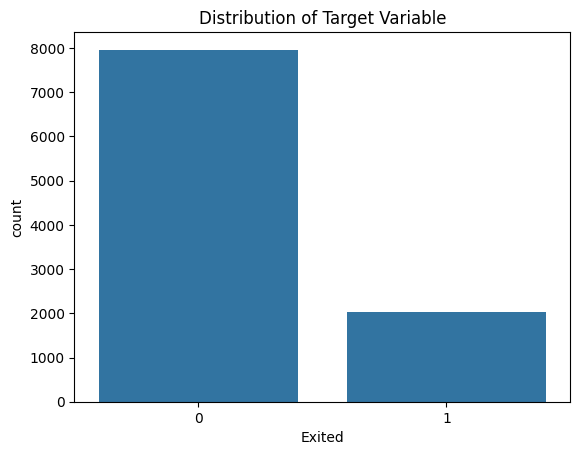

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Exited', data=df)
plt.title('Distribution of Target Variable')
plt.show()

<hr>

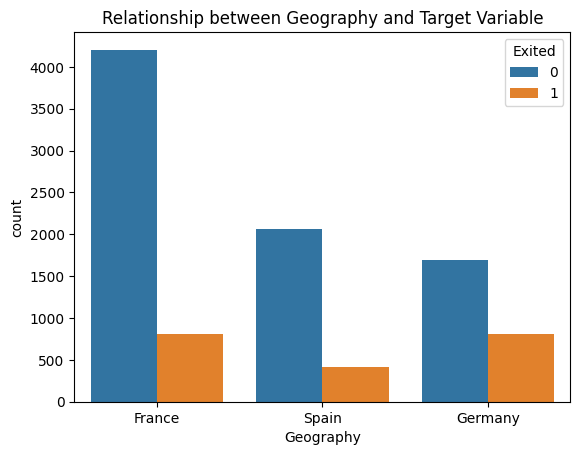

In [126]:
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Relationship between Geography and Target Variable')
plt.show()

<hr>

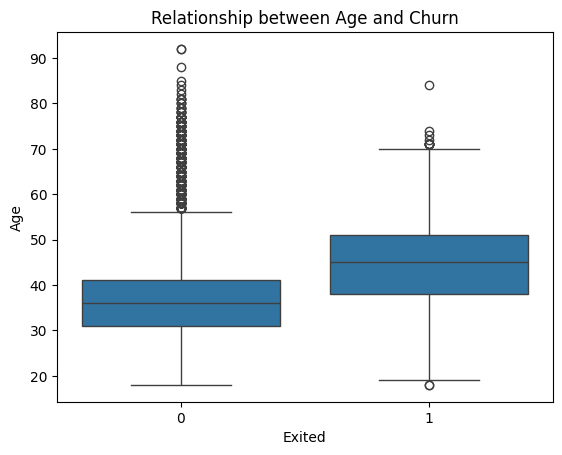

In [127]:
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Relationship between Age and Churn')
plt.show()

<hr><hr>

<h1>7. Feature Engineering.</h1>

<h2>*   Need to create <b>new features</b>, encode <b>categorical variables</b>, and <b>normalize</b> the <b>data</b> before building a <b>model</b>:</h2>


In [128]:
df_dummy = pd.get_dummies(df, drop_first=False)
df_dummy

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,False,False,False,False,False,True,False,False,True,False
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,False,False,False,False,False,False,False,True,True,False
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,False,False,False,False,False,True,False,False,True,False
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,False,False,False,False,False,True,False,False,True,False
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,...,False,False,False,False,False,True,False,False,False,True
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,...,False,False,False,False,False,True,False,False,False,True
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,...,False,False,False,False,False,True,False,False,True,False
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,...,False,False,False,False,False,False,True,False,False,True


In [129]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [130]:
df_dummy[['Age','Balance','EstimatedSalary']] = ss.fit_transform(df_dummy[['Age','Balance','EstimatedSalary']])

<hr><hr>

<h1>9. Building a Predictive Model.</h1>

<h2>*   Once the <b>data</b> is <b>prepared</b>, we can split it into <b>Training</b> and <b>Testing sets</b> and <b>build</b> a <b>predictive model</b>:</h2>



In [131]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X=df_dummy.drop('Exited',axis=1)
y=df_dummy['Exited']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [134]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

<hr><hr>

<h1>10. <b>Predicting</b> Churn.</h1>

In [137]:
pred = model.predict(X_test)
pred

array([0, 0, 0, ..., 1, 0, 0])

<hr><hr>

<h1>11. Visualizing Number of Churn.</h1>

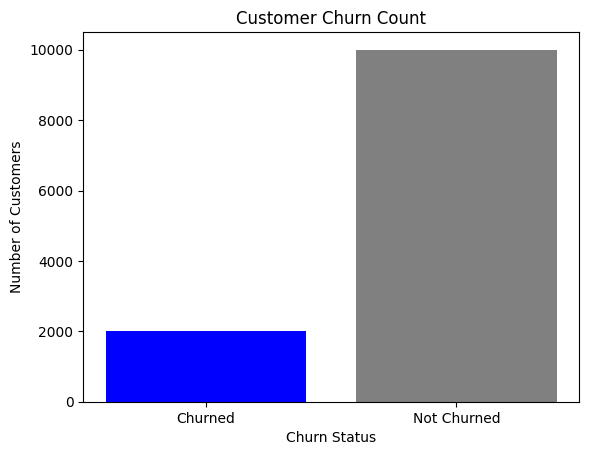

In [149]:
import matplotlib.pyplot as plt

churn_category = ['Churned', 'Not Churned']
churn_counts = [len(pred), len(df['CustomerId'])]

plt.bar(churn_category, churn_counts, color=['blue', 'grey'])
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Count')
plt.show()

<hr><hr>

  <a>
    <img src="https://github.com/user-attachments/assets/08ed2cbc-1be6-4690-a6c1-49a98a9787d6" width="600" height="300" />
  </a><br>